# Used Car Auction Modelling & Analysis with Machine Learning

- Nama      : Ahmad Nafiys Ismail
- Batch     : Data Science 25th
- Kelompok  : CARR-ELO (Grup 5)
- Dataset   : Car Auction Prices 
https://www.kaggle.com/datasets/tunguz/used-car-auction-prices 

In [ ]:
!python --version

Python 3.7.15


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

Industri mobil bekas merupakan suatu industri yang menarik untuk diamati pertumbuhannya disamping itu harga mobil terus berubah tergantung berbagai faktor. Di bawah ini adalah penjelasan atas fitur/kolom dari data mobil bekas yang paling penting untuk dipahami ketika akan membeli mobil bekas di lelang:

- `Year` : Tahun produksi mobil
- `Make` : Merk/pabrikan mobil
- `Model` : Model/jenis mobil dari brand tertentu. cth: avanza, innova, mobilio, dll
- `Trim` : Jenis mobil berbeda dari model brand tertentu
- `Body` : Tipe/Jenis dari mobil cth: sedan, suv, dll
- `Transmission` : Jenis transmisi dari mobil yaitu manual dan automatic
- `VIN` : Vehicle identification number/Plat Nomor Mobil
- `State` : Daerah dimana mobil dilelang
- `Condition` : Kondisi mobil saat dilakukan lelang mulai dari 1 - 5
- `Odometer` : Jarak tempuh dari mobil sejak keluar pabrik
- `Color` : Warna exterior mobil
- `Interior` : Warna interior mobil
- `Seller` : Penjual mobil/dealer
- `mmr` : Manhiem market record/harga estimasi market price
- `sellingprice` : Harga mobil yang terjual pada saat lelang
- `saledate` : tanggal mobil terjual di lelang

In [ ]:
# Cara 1 - Local File (harus upload)
df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
df.head()

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
# Cara 2 - Online using G-Sheet

# df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQNj58Nife2nRMtJFhszCWj7Paw2zoegJgmOy1uXTTnJoXng01h_wHqHesh3qqWCd7Lfh3FYGosD3VO/pub?gid=897099369&single=true&output=csv',error_bad_lines=False,warn_bad_lines=True)
# df

# **Stage 1 : EDA, Insights, & Visualization**

## Part 1.1 - Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [ ]:
df.isnull().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat kolom yang memiliki missing value, antara lain:
 - make
 - model
 - trim
 - body
 - transmission 
 - vin
 - condition
 - odometer
 - color
 - interior

kolom yang memiliki missing value terbanyak ada di kolom transmisson

In [ ]:
df.duplicated().any()

False

Tidak ada data yang duplikat di dalam dataset

In [ ]:
#  kategorisasi
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cats = ['make','model', 'body', 'transmission', 'trim', 'vin', 'state','color', 'interior', 'seller', 'saledate']

### Fitur Deskriptif

In [ ]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   condition     547017 non-null  float64
 2   odometer      558717 non-null  float64
 3   mmr           558811 non-null  int64  
 4   sellingprice  558811 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 21.3 MB


In [ ]:
df[nums].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   make          548510 non-null  object
 1   model         548412 non-null  object
 2   body          545616 non-null  object
 3   transmission  493458 non-null  object
 4   trim          548160 non-null  object
 5   vin           558811 non-null  object
 6   state         558811 non-null  object
 7   color         558062 non-null  object
 8   interior      558062 non-null  object
 9   seller        558811 non-null  object
 10  saledate      558811 non-null  object
dtypes: object(11)
memory usage: 46.9+ MB


In [ ]:
df[cats].describe()

,make,model,body,transmission,trim,vin,state,color,interior,seller,saledate
count,548510,548412,545616,493458,548160,558811,558811,558062,558062,558811,558811
unique,96,973,86,2,1975,550296,38,20,17,14264,3745
top,Ford,Altima,Sedan,automatic,Base,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,199437,475914,55817,5,82945,110970,244325,19693,5334


Analisis Numericals:
- adanya anomali pada nilai minimum sellingprice 

Analisis Categoricals:
 - Kolom transmission didominasi oleh mobil dengan transmisi automatic (lebih dari 50%),
 - Kolom color dan interior didominasi oleh mobil dengan warna exterior dan interior black
 - Kolom make didominasi oleh mobil dengan merk Ford.

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count kolom body:
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
g37 coupe           1
cab plus 4          1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: body, Length: 86, dtype: int64

Value count kolom transmission:
automatic    475914
manual        17544
Name: transmission, dtype: int64

Value count kolom trim:

Pengamatan Descriptive Statistik:
- Data terdiri dari 558811 baris dan 16 kolom
- Tidak ada issue pada nama dan isi setiap kolom
- Tampak beberapa kolom masih memiliki null/missing values kolom make, mode, trim, body, transmission, vin, condition, odometer, color, interior)
- Missing values terbesar berada pada kolom transmission sejumlah 65353


## Part 1.2 - Univariate Analysis

### Boxplot

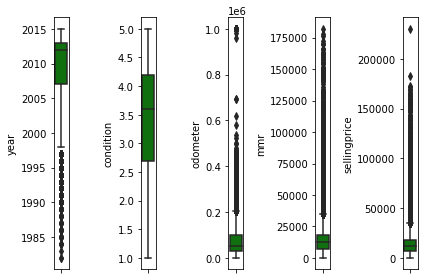

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Definisikan outlier menggunakan Quantile (IQR)

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].quantile(.25)
    Q3 = df[x].quantile(.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

#### Detect Outlier Features

In [ ]:
out_cond = detect_outliers(df, 'condition').shape[0] 
print('Jumlah outlier column condition :', out_cond)

Jumlah outlier column condition : 0


In [ ]:
out_odo = detect_outliers(df, 'odometer').shape[0]
print('Jumlah outlier column odometer :', out_odo)

Jumlah outlier column odometer : 10375


In [ ]:
out_mmr = detect_outliers(df, 'mmr').shape[0]
print('Jumlah outlier column mmr :', out_mmr)

Jumlah outlier column mmr : 16315


Dari column feature dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column condition tidak memiliki outlier. Untuk odometer memiliki outlier sebanyakk 10375 dan column mmr memiliki 16315 outlier. 

#### Detect Outlier Target

In [ ]:
out_sell = detect_outliers(df, 'sellingprice').shape[0]
print('Jumlah outlier column sellingprice :', out_sell)

Jumlah outlier column sellingprice : 16354


Dari column target dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column sellingprice memiliki **16354 outlier**

### Analisa Boxplot Features dan Target

Dari gambar boxplot didapat bahwa column condition tidak memiliki outlier dan distribusinya cenderung negative skewed. Untuk column lain yaitu odometer,mmr dan sellingprice banyak outlier yang terletak di nilai yang lebih besar (positive skewed). Serta dari function detect outlier bisa melihat banyaknya outlier. Oleh karena itu pada data preprocessing dan cleaning, bisa dilakukan penghapusan outlier dengan metode quantile IQR maupun menggunakan log transformation untuk mengatasi positive skewed

### Distribution Plot

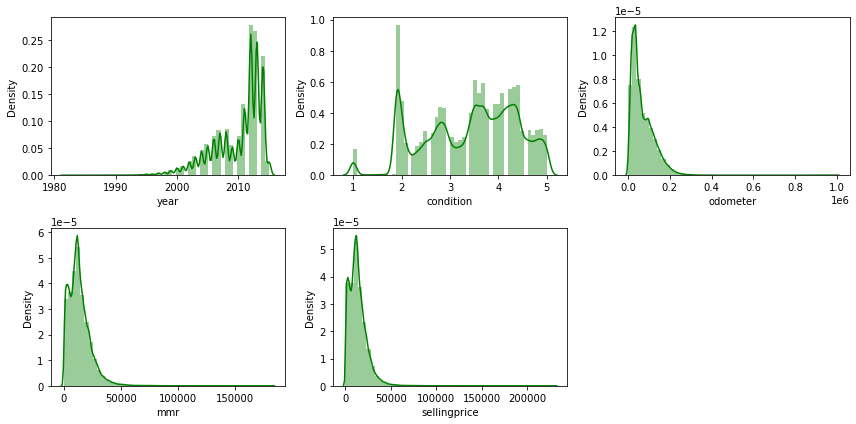

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

### Analisa Distribution Plot

- Dari distribution plot terlihat untuk feature odometer, selling price, serta mmr memiliki distribusi yang positif (positively skewed) dimana nilai outlier cukup jauh ke kanan atau berada di nilai yang besar. sedangkan umumnya data fitur tersebar nilai yang cukup rendah.

- Target memiliki kemiringan yang positif dimana nilai outliernya pun berada pada nilai yang besar

- fitur condition perlu diperhatikan dikarenakan memiliki skala ordinal pada distribution plot

- fitur tahun memiliki distribusi kemiringan negatif, yang dimana data/transaksi terjadi cukup benyak >2010



### Countplot

ValueError: num must be 1 <= num <= 5, not 6

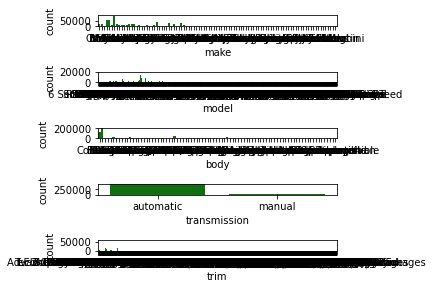

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(5,1, i+1)
    sns.countplot(df[cats[i]], color='green', orient='h')
    plt.tight_layout()

### Analisa Countplot Features 

Dari countplot dapat terlihat,pada beberapa feature seperti 'make', 'model', 'trim', 'body', 'color', 'interior'  'vin', 'state', terlihat sangat banyak sekali kategori, ada kategori yang mendominasi dan ada yang jumlahnya sangat jauh lebih sedikit. Kategori yang terlalu banyak dapat menurunkan performance komputasi machine learning. Kategori yang jumlah nya sangat lebih sedikit ini dapat dimasukkan ke kategori baru yaitu 'other' misalnya.

## Check Duplicate

In [ ]:
#check duplicate
df.duplicated().sum()

0

## Missing Value

In [ ]:
df.isna().sum().sort_values(ascending=False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

# Part 1.3 - Multivariate Analysis

In [ ]:
corr=df.corr()
corr

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


### Correlation Heatmap

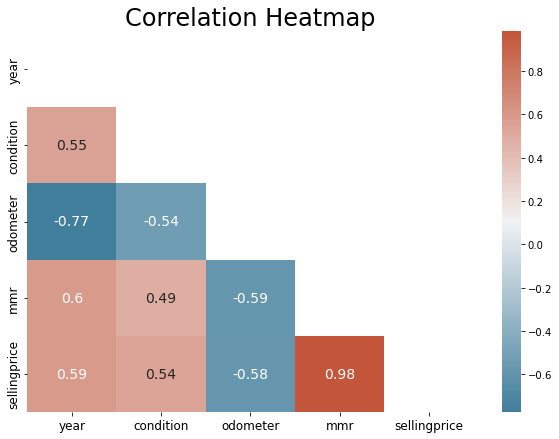

In [ ]:
# Correlation Heatmap 
mask = np.triu(np.ones_like(corr, dtype=bool))# Generate a mask for upper traingle
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=cmap,annot_kws={'size':14})
plt.title("Correlation Heatmap", fontsize =24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Dari Correlation Heatmap diatas diperoleh beberapa informasi berikut :

*   Target sellingprice dan feature mmr memiliki korelasi positif yang sangat kuat.
*   Target juga memiliki korelasi yang cukup kuat dengan beberapa feature independent lainnya (year, condition, odometer)
*   Feature odometer dan year memiliki korelasi negatif yang sangat kuat. Secara umum nilai koefisien korelasi pearson yang lebih besar dari 0,7 menunjukkan adanya multi-collinearity (ada kemungkinan kedua features tersebut redundan dan saling mempengaruhi secara terbalik terhadap variabel lain).

### Pair Plots

<Figure size 720x720 with 0 Axes>

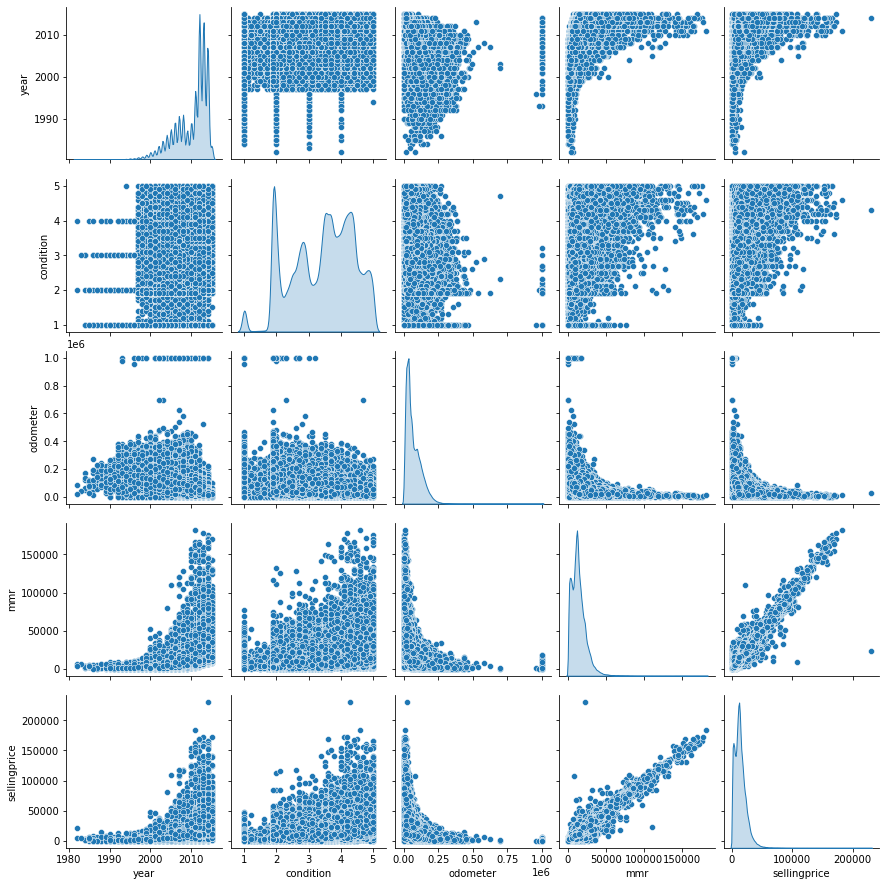

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df, diag_kind='kde')

Dari pair plot diatas terlihat bahwa :
- Semakin tinggi tahun (mobil keluaran baru) maka harga semakin mahal, sebaliknya semakin rendah tahun (mobil keluaran lama) maka harga semakin murah.
- Semakin tinggi condition maka harga akan semakin mahal, sebaliknya semakin rendah condition maka harga akan semakin murah.
- Semakin tinggi odometer maka harga akan semakin rendah, sebaliknya jika odometer rendah maka sellingprice akan tinggi.
- Target sellingprice memiliki korelasi positif linear dengan feature mmr. Semakin tinggi nilai mmr maka akan semakin tinggi nilai sellingprice.

# Part 1.4 - Business Insight

### Top 10 Mobil yang laku terjual berdasarkan brand

In [ ]:
df['make'].value_counts().iloc[:10]

Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: make, dtype: int64

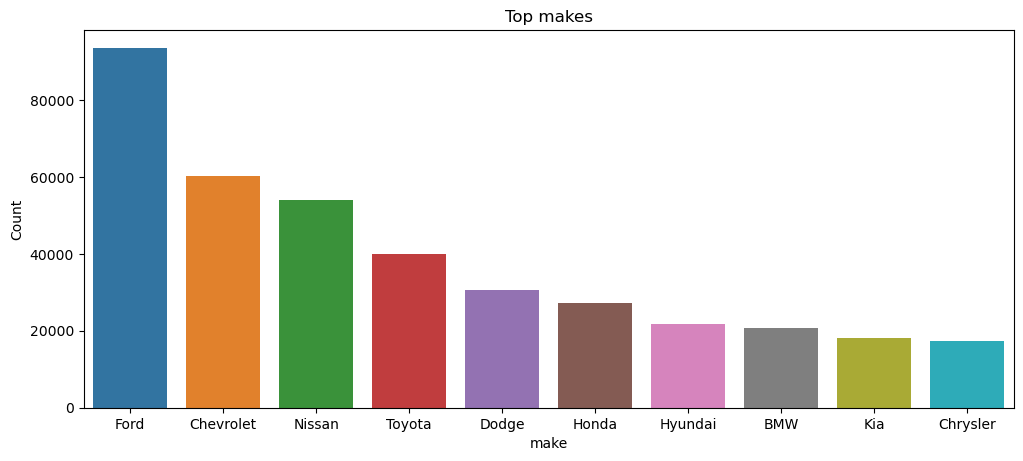

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['make'], order=df['make'].value_counts().index[:10])
plt.title('Top makes')
plt.ylabel("Count")
plt.show()

### Top 10 model yang laku terjual

In [ ]:
df['model'].value_counts().iloc[:10]

Altima           19349
F-150            14479
Fusion           12946
Camry            12545
Escape           11861
Focus            10394
Accord            9127
3 Series          8204
Grand Caravan     7941
Impala            7923
Name: model, dtype: int64

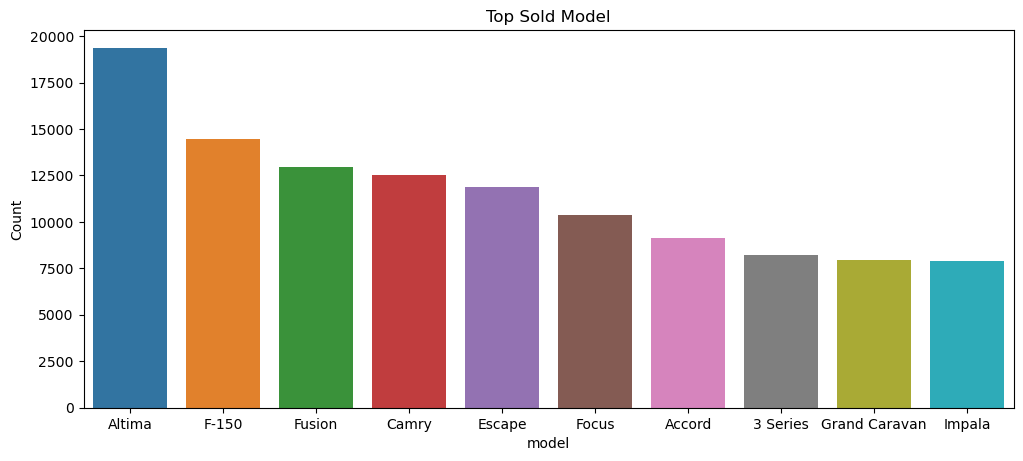

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['model'], order=df['model'].value_counts().index[:10])
plt.title('Top Sold Model')
plt.ylabel("Count")
plt.show()

### Top 10 Tipe/jenis mobil yang laku terjual

In [ ]:
df['body'].value_counts().iloc[:10]

Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
Minivan         21363
Coupe           14602
Wagon           13630
Crew Cab        13280
Convertible      8652
Name: body, dtype: int64

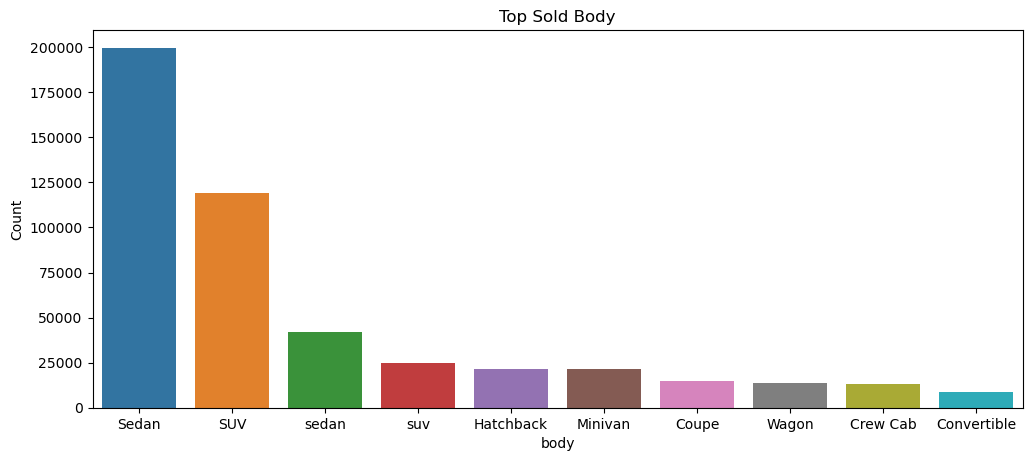

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['body'], order=df['body'].value_counts().index[:10])
plt.title('Top Sold Body')
plt.ylabel("Count")
plt.show()

### Top 10 state/wilayah dengan pembelian mobil terbanyak

In [ ]:
df['state'].value_counts().iloc[:10]

fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
Name: state, dtype: int64

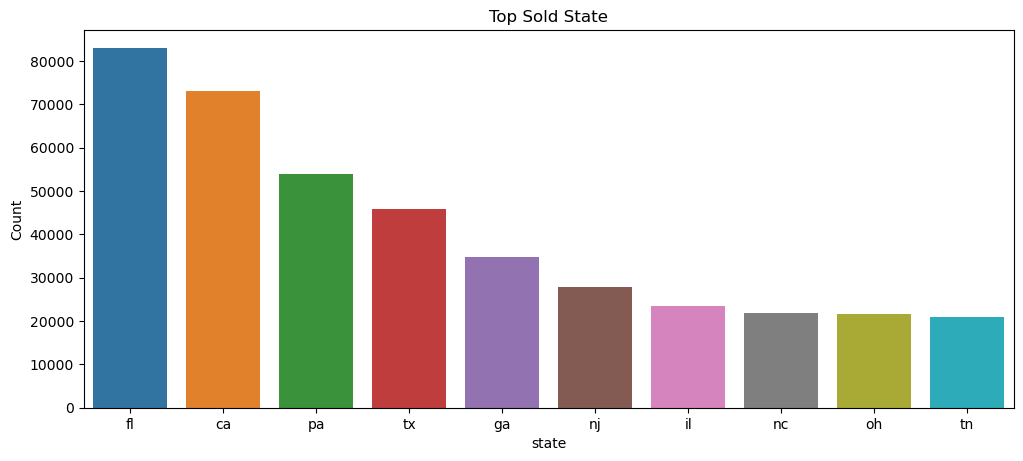

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['state'], order=df['state'].value_counts().index[:10])
plt.title('Top Sold State')
plt.ylabel("Count")
plt.show()

### Top 10 Color yang laku terjual

In [ ]:
df['color'].value_counts().iloc[:10]

black     110970
white     106673
silver     83389
gray       82857
blue       51139
red        43569
—          24685
green      11382
gold       11342
beige       9222
Name: color, dtype: int64

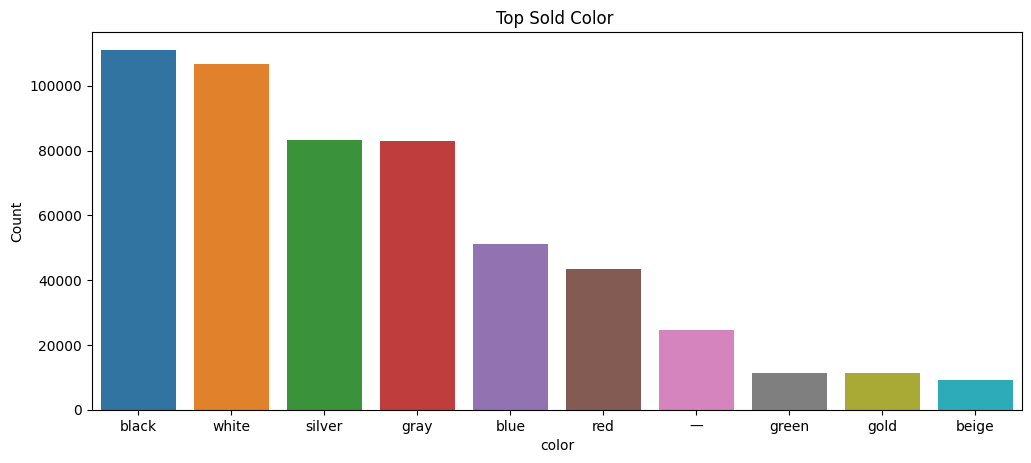

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['color'], order=df['color'].value_counts().index[:10])
plt.title('Top Sold Color ')
plt.ylabel("Count")
plt.show()

### Transmisi yang lebih laku terjual

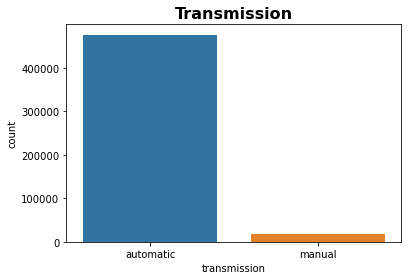

In [ ]:
sns.countplot(x = 'transmission', data = df)
plt.title('Transmission', fontsize = 16, fontweight='bold');

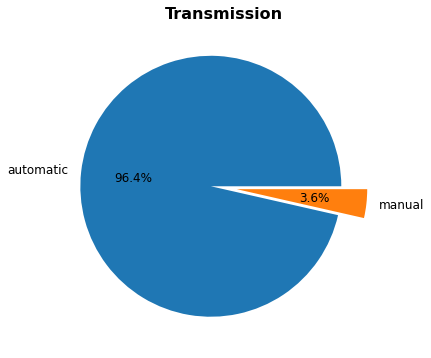

In [ ]:
df['transmission'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%.1f%%', figsize=(6,6),fontsize=12)
plt.title('Transmission',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

### Sebaran unit yang laku terjual sesuai kondisi

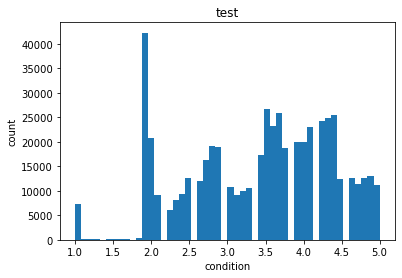

In [ ]:
plt.hist(df['condition'],bins=50)
plt.title('test')
plt.xlabel('condition')
plt.ylabel('count')
plt.show()

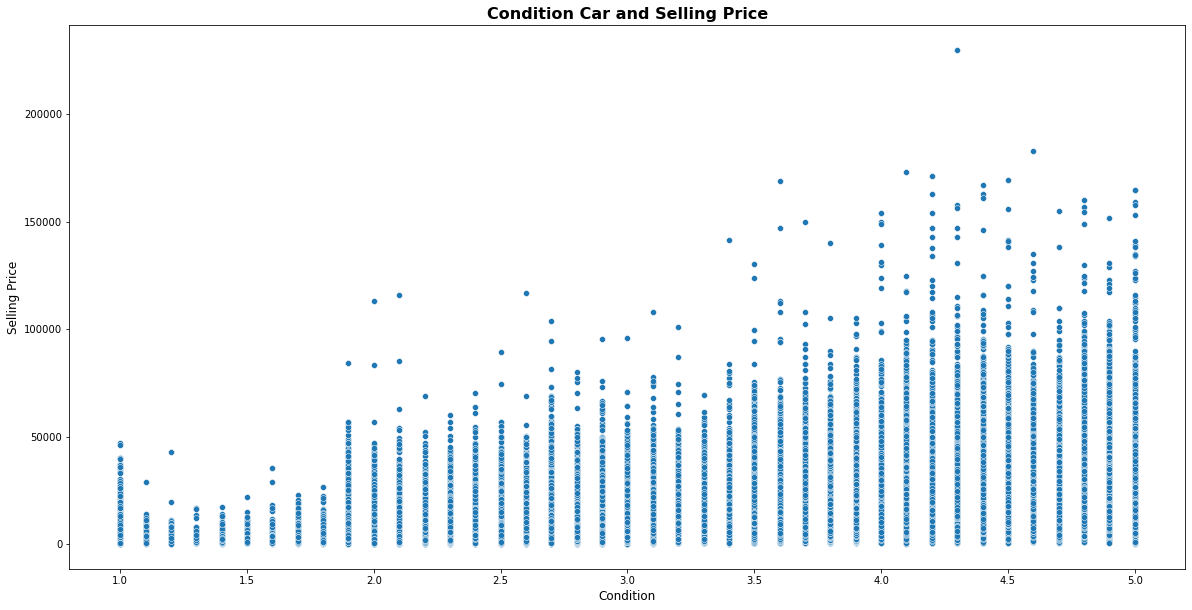

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='condition',y='sellingprice',data=df)
plt.title('Condition Car and Selling Price',fontsize=16, fontweight='bold')
plt.xlabel('Condition',fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

plt.show()

###  Total cars sold by car's production year

In [ ]:
# Agregasi jumlah mobil terjual berdasarkan tahun produksi 
byyr =  df.groupby('year').agg({'year':'count',
                                   'sellingprice':'mean'})
byyr.columns = ['total_cars', 'mean_selling_price']
byyr.reset_index(inplace=True)
byyr.head()

,year,total_cars,mean_selling_price
0,1982,2,12750.000000
1,1983,1,5250.000000
2,1984,5,2160.000000
3,1985,10,3520.000000
4,1986,11,2538.636364


Text(0, 0.5, 'Total Cars')

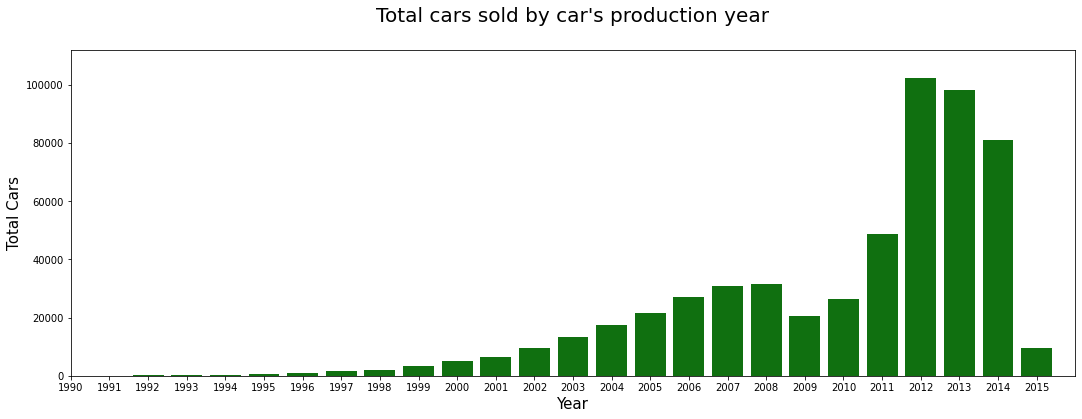

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='year', y='total_cars', data=byyr,
                 color='green')
plt.ylim(0, 112000)
plt.xlim(8, 34)
plt.title("Total cars sold by car's production year\n", fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Cars', fontsize=15)

###  Average selling price by production year

Text(0, 0.5, 'Avg Selling Price')

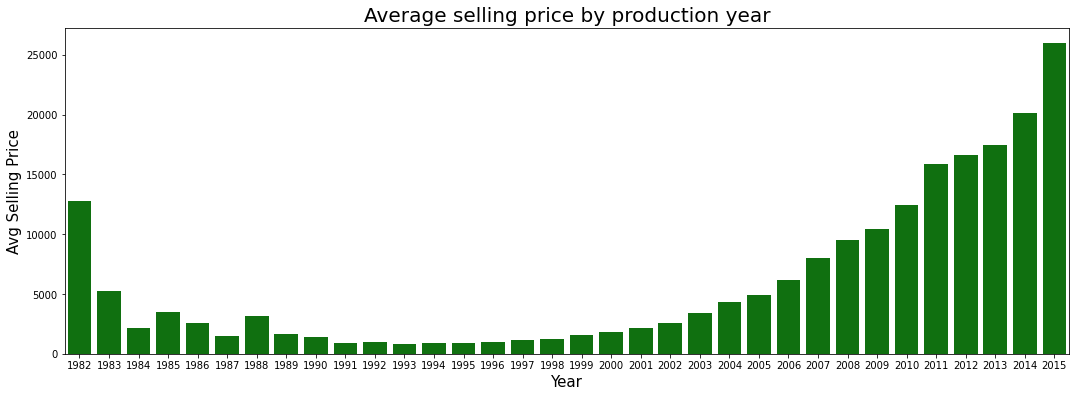

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='year', y='mean_selling_price', data=byyr,
                 color='green')
plt.title('Average selling price by production year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Avg Selling Price', fontsize=15)

### Average Selling Price By Odometer

In [ ]:
odo =  df.groupby('odometer').agg({'odometer':'count',
                                   'sellingprice':'mean'})
odo.columns = ['total_cars', 'mean_selling_price']
odo.reset_index(inplace=True)
odo.head()

,odometer,total_cars,mean_selling_price
0,1.0,1315,2389.955894
1,2.0,12,16658.333333
2,3.0,9,25127.777778
3,4.0,9,19961.111111
4,5.0,16,18037.500000


(0.0, 165000.0)

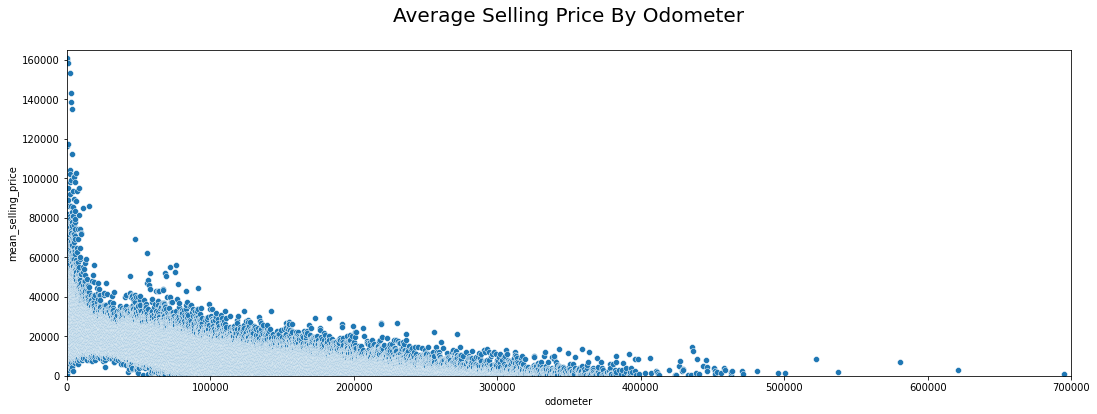

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='odometer', y= 'mean_selling_price', data=odo)
plt.title("Average Selling Price By Odometer\n", fontsize=20)
plt.xlim(0,700000)
plt.ylim(0,165000)

### Total Car's Sold By Conditon

In [ ]:
con =  df.groupby('condition').agg({'condition':'count',
                                   'sellingprice':'mean'})
con.columns = ['total_cars', 'mean_selling_price']
con.reset_index(inplace=True)
con.head()

,condition,total_cars,mean_selling_price
0,1.0,7364,3923.135932
1,1.1,87,4504.482759
2,1.2,95,3820.789474
3,1.3,82,3554.878049
4,1.4,134,3323.880597


Text(0.5, 1.0, 'Total Sold Car By Condition\n')

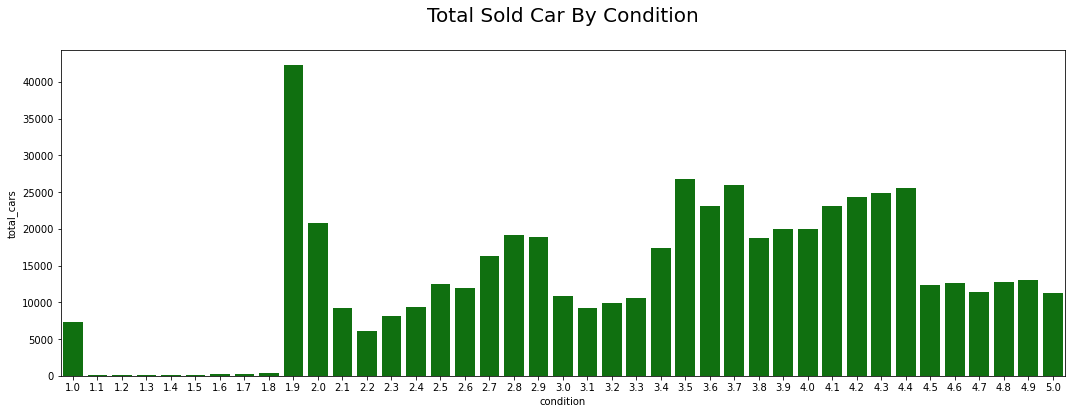

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='condition', y='total_cars', data=con,
                 color='green')
plt.title("Total Sold Car By Condition\n", fontsize=20)

### Averag selling price By Condition 

Text(0.5, 1.0, 'Average Selling Price By Condition\n')

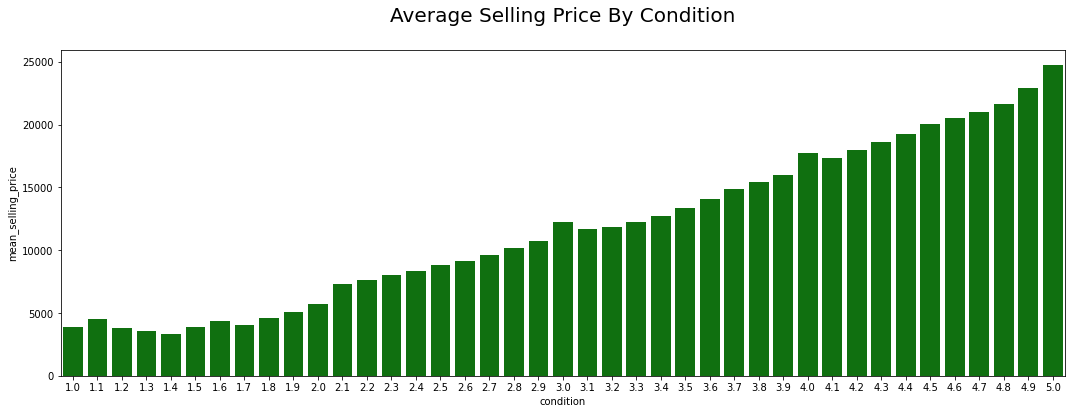

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='condition', y='mean_selling_price', data=con,
                 color='green')
plt.title("Average Selling Price By Condition\n", fontsize=20)

### Price Segmentation

In [ ]:
# Grouping and sum up total project value according to each buyer_group_id
df_mon = df.groupby(['make'], as_index=False).agg({'sellingprice':'mean'})
df_mon = df_mon.rename(columns={'sellingprice':'Sell_Price'})
df_mon

,make,Sell_Price
0,Acura,14017.268260
1,Aston Martin,54812.000000
2,Audi,19915.432782
3,BMW,21441.895748
4,Bentley,74367.672414
...,...,...
91,subaru,3710.416667
92,suzuki,4810.000000
93,toyota,7339.105263
94,volkswagen,6145.833333


In [ ]:
df_mon['Sell_Price2'] = MinMaxScaler().fit_transform(df_mon[['Sell_Price']])

In [ ]:
y = KMeans(n_clusters = 3).fit(df_mon['Sell_Price2'].to_numpy().reshape(-1, 1))
df_mon['monetary_score']=y.labels_

In [ ]:
display(df_mon['monetary_score'].value_counts())

0    81
2    12
1     3
Name: monetary_score, dtype: int64

In [ ]:
mon = df_mon.sort_values('Sell_Price').monetary_score.unique()
df_mon['monetary_score'] = df_mon['monetary_score'].replace({mon[0]:1,mon[1]:2,mon[2]:3})

In [ ]:
min_val = df_mon.groupby('monetary_score').agg({'Sell_Price':'min'})['Sell_Price'].values.tolist()
min_val.sort()
print('Nilai Minimal:',min_val)
max_val = df_mon.groupby('monetary_score').agg({'Sell_Price':'max'})['Sell_Price'].values.tolist()
max_val.sort()
print('Nilai Maksimal:',max_val)

Nilai Minimal: [400.0, 28400.0, 112625.0]
Nilai Maksimal: [25299.936816790556, 74367.6724137931, 153488.23529411765]


In [ ]:
def segment_price(x):
    if x==1:
        return 'low_price'
    elif x==2:
        return 'medium_price'
    else:
        return 'high_price'
        
df_mon['segment_price'] = df_mon['monetary_score'].apply(segment_price)
df_mon.head()

,make,Sell_Price,Sell_Price2,monetary_score,segment_price
0,Acura,14017.268260,0.088950,1,low_price
1,Aston Martin,54812.000000,0.355429,2,medium_price
2,Audi,19915.432782,0.127478,1,low_price
3,BMW,21441.895748,0.137449,1,low_price
4,Bentley,74367.672414,0.483170,2,medium_price


In [ ]:
df_mon = df_mon.drop(columns=['Sell_Price2','monetary_score'])
df_mon.head()

,make,Sell_Price,segment_price
0,Acura,14017.268260,low_price
1,Aston Martin,54812.000000,medium_price
2,Audi,19915.432782,low_price
3,BMW,21441.895748,low_price
4,Bentley,74367.672414,medium_price


Text(0.5, 1.0, 'Price each Segment')

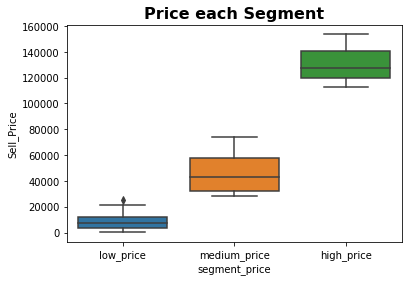

In [ ]:
sns.boxplot(data=df_mon, x='segment_price',y='Sell_Price')
plt.title('Price each Segment', fontsize = 16, fontweight='bold')

Text(0.5, 1.0, 'Price Segmentation Based on Car')

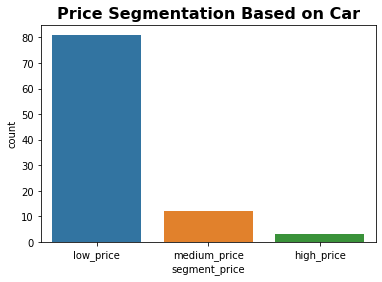

In [ ]:
sns.countplot(x='segment_price', data=df_mon)
plt.title('Price Segmentation Based on Car', fontsize = 16, fontweight='bold')

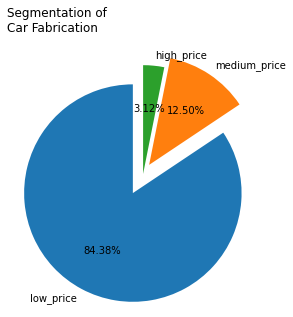

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('xkcd:white')
plt.title('Segmentation of \nCar Fabrication', loc='left')
sizes = df_mon['segment_price'].value_counts().values.tolist()
labels = df_mon['segment_price'].value_counts().index.tolist()
explode = [0.2,0.1,0]
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)
plt.show()

Price Segmentation of All Data

In [ ]:
df_mon_clus = df.copy(deep=True)

In [ ]:
def segment_price(x):
    if x < 25299.936816790556:
        return 'Low'
    elif x > 112625.0:
        return 'High'
    else:
        return 'Medium'
        
df_mon_clus['segment_price_clus'] = df_mon_clus['sellingprice'].apply(segment_price)
df_mon_clus.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,segment_price_clus
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Low
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),Low
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),Medium
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),Medium
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),Medium


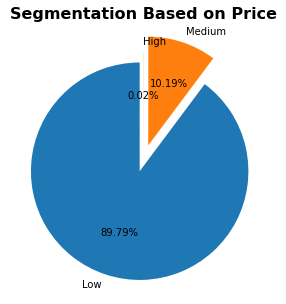

In [ ]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('xkcd:white')
plt.title('Segmentation Based on Price',  fontsize = 16, fontweight='bold')
sizes = df_mon_clus['segment_price_clus'].value_counts().values.tolist()
labels = df_mon_clus['segment_price_clus'].value_counts().index.tolist()
explode = [0.1,0.15,0]
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, explode=explode)
plt.show()

### Summary Business Insight

Berdasarkan dataset yang kami analisa, kami dapati kondisi sebagai berikut:


*   Brand Ford, Chevrolet & nissan merupakan brand yang laku terjual dan banyak diminati di amerika.
Dealer dapat menyusun komposisi stok unit sesuai unit yang diminati masyarakat.

*   Preferensi tipe mobil berdasarkan mobil yang terjual adalah tipe sedan dan SUV.
Dealer dapat mempriotitaskan untuk membeli varian sedan & suv karena banyak diminati.

*   Unit yang laku terjual dan banyak diminati adalah unit dengan transmisi automatic.
Dealer dapat membeli unit stok dengan proporsi terbanyak adalah transmisi automatic.

*  Semakin baik kondisi mobil (rating diatas 3) maka harga belinya juga semakin tinggi sementara unit dengan kondisi buruk (rating dibawah 3) banyak diminati karna harga lebih murah.
Dealer dapat membeli unit dengan kualitas kondisi dibawah 3 untuk kemudian diperbaiki sebelum dijual dengan harga yang lebih baik agar mendapatkan keuntungan yang lebih baik.

*  Harga mobil dapat disegmentasi menjadi low, medium dan high. Dengan jumlah terbanyak adalah Low, diikuti medium dan high yang paling sedikit. Ini sesuai dengan kenyataan bahwa dalam lelang mobil bekas, mobil yang dicari adalah mobil yang harganya murah.



# **Stage 2 : Data Preprocessing**

## Part 2.1 - Data Cleansing

In [ ]:
# check all columns
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

### Drop Columns

Beberapa kolom yang dihapus antara lain :
- vin
- state
- interior
- seller
- mmr
- saledate

### **vin**

In [ ]:
df['vin'].unique()

array(['5xyktca69fg566472', '5xyktca69fg561319', 'wba3c1c51ek116351', ...,
       '5uxzw0c58cl668465', '1n4al3ap0fc216050', '1ftfw1et2eke87277'],
      dtype=object)

In [ ]:
df.drop(columns = 'vin', inplace = True, axis = 1)

VIN (Vehicle Identification Number) merupakan plat nomor mobil bersifat unik yang dimiliki oleh tiap unit mobil. Alasan menghapus feature vin adalah karena feature ini tidak memiliki pengaruh terhadap target sellingprice karena bukan sebagai aspek penting yang dipertimbangkan dalam penentuan harga kendaraan

### **interior**

Perbandingan kolom color dan interior

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [ ]:
df['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [ ]:
df.drop(columns = 'interior', inplace = True, axis = 1)

Feature interior memiliki nilai yang sama dengan feature color. Alasan menghapus feature interior dan memilih mempertahankan feature color adalah karena lebih mudah mengidentifikasi mobil berdasarkan warna exterior.  

### **seller**

Perbandingan kolom make dan seller

In [ ]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [ ]:
df['make'].nunique()

96

In [ ]:
df['seller'].unique()

array(['kia motors america, inc',
       'financial services remarketing (lease)',
       'volvo na rep/world omni', ..., 'maserati north america inc',
       'alternative financial group inc', 'i -5 uhlmann rv'], dtype=object)

In [ ]:
df['seller'].nunique()

14264

In [ ]:
df.drop(columns = 'seller', inplace = True, axis = 1)

Alasan menghapus feature seller adalah karena feature ini memiliki unique value yang sangat banyak, sehingga dapat menyulitkan dalam proses feature encoding dan juga karena memiliki kemiripan dan bisa diwakili oleh kolom make.

### **mmr**

In [ ]:
# check correlation between target and mmr
df['sellingprice'].corr(df['mmr'])

0.9836337168977258

In [ ]:
df.drop(columns = 'mmr', inplace = True, axis = 1)

Korelasi antara target sellingprice dan feature mmr memiliki nilai positif yang sangat kuat (0.98), sehingga feature mmr dihapus untuk menghindari redundan antar kedua feature. Permasalahan lain adalah distribusi dari mmr yang skewed dan bisa sangat memengaruhi prediksi sellingprice saat dilakukan training. Oleh karena itu salah satu opsinya adalah didrop.

### **saledate**

In [ ]:
df['saledate'].nunique()

3745

In [ ]:
df.drop(columns = 'saledate', inplace = True, axis = 1)

Nilai dari saledate berkisar dari 2014 hingga 2015 sehingga kurang banyak digali insightnya, dan waktu terjual sangat banyak faktor yang memengaruhinya seperti waktu ketersediaan pasokan, dll. yang membuatnya kurang relevan faktor saledate bisa didrop.

### **state**

In [ ]:
df['state'].nunique()

38

In [ ]:
df['state'] = df['state'].str.lower()
df['state'].nunique()

38

In [ ]:
df.drop(columns = 'state', inplace = True, axis = 1)

Alasan state dihapus karena memiliki cukup banyak state dan menyusahkan saat encoding, dan juga persebaran dari tiap state yang berdistribusi normal terhadap sellingprice sehingga bisa didrop

In [ ]:
# check all columns after drop columns
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'sellingprice'],
      dtype='object')

In [ ]:
#  kategorisasi
nums_update = ['year', 'condition', 'odometer', 'sellingprice']
cats_update = ['make','model', 'trim', 'body','transmission','color']

### Handle Unique Values

### **make**

In [ ]:
df['make'].nunique()

96

In [ ]:
df['make'] = df['make'].str.lower()
df['make'].nunique()

66

In [ ]:
df['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [ ]:
df=df.replace({'make':
        {'mercedes' : 'mercedes-benz', 'gmc truck': 'gmc','dodge tk':'dodge','mazda tk': 'mazda','hyundai tk':'hyundai',
         'mercedes-b' : 'mercedes-benz','vw' : 'volkswagen','chev truck' : 'chevrolet', 'ford tk' : 'ford', 'ford truck' : 'ford'
        }})
df['make'].nunique()

56

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **make**.

### **model**

In [ ]:
df['model'].nunique()

973

In [ ]:
df['model'] = df['model'].str.lower()
df['model'].nunique()

851

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **model**.

### **trim**

In [ ]:
df['trim'].nunique()

1975

In [ ]:
df['trim'] = df['trim'].str.lower()
df['trim'].nunique()

1901

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **trim**.

### **body**

In [ ]:
df['body'].nunique()

86

In [ ]:
df['body'] = df['body'].str.lower()
df['body'].nunique()

45

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **body**.

### **transmission**

In [ ]:
df['transmission'].nunique()

2

In [ ]:
df['transmission'] = df['transmission'].str.lower()
df['transmission'].nunique()

2

feature **transmission** sudah memiliki data yang sesuai, sehingga tidak ada perubahan nilai unique value sebelum dan sesudah handling data.

### **color**

In [ ]:
df['color'].nunique()

20

In [ ]:
df['color'] = df['color'].str.lower()
df['color'].nunique()

20

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [ ]:
df=df.replace({'color':
        {'—' : 'others', 'off-white' : 'white'}})
df['color'].nunique()

19

Terdapat perbedaan jumlah uniqe data sebelum dan sesudah handling feature **color**.

#### Summary Data Cleansing :
- Beberapa feature yang di drop/ dihapus dari dataset adalah feature vin, interior, seller, mmr, state, dan saledate.
- Penanganan unique value (mengubah karakter tiap data menjadi huruf kecil) dari beberapa feature kategorikal dibutuhkan untuk menyesuaikan nilai dari tiap feature.

## Part 2.2 - Handle Missing Values

In [ ]:
df.isna().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
odometer           94
year                0
sellingprice        0
dtype: int64

In [ ]:
# impute transmission dengan modus
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

#fill N/A menggunakan modus untuk data kategorikal transmisi

In [ ]:
# drop `body`, `model`, `trim`, `condition`, `color`, `odometer`, dan `make`
df = df.dropna()

#Melakukan drop atas data yang N/A untuk selain fitur transmisi karena data yang N/A tidak banyak
#selain itu jika dilakukan pengisian menggunakan modus dikhawatirkan data akan bias

1. transmission: impute dengan nilai modus (automatic),
2. body, trim, condition, color, odometer, make, dan model : drop (karena secara data yang N/A tidak banyak dan jikalau diisi menggunakan modus data dikhawatirkan akan bias),
3. year, saledate, dan sellingprice: tidak memiliki missing values sehingga tidak perlu dihandle.

In [ ]:
#ALTERNATIF

# impute body dengan modus
df['body'] = df['body'].fillna(df['body'].mode()[0])

# impute condition dengan median
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

# impute trim dengan modus
df['trim'] = df['trim'].fillna(df['trim'].mode()[0])

# impute model dengan modus
df['model'] = df['model'].fillna(df['model'].mode()[0])

# impute make dengan modus
df['make'] = df['make'].fillna(df['make'].mode()[0])


## Part 2.3 - Handle Duplicated Data

In [ ]:
df.duplicated().sum()

3

Tidak terdapat data duplicate didalam dataset, sehingga tidak diperlukan penanganan lebih lanjut.

## Part 2.4 - Handle Outliers

### Cara 1 : Menggunakan IQR

In [ ]:
df.duplicated().sum()

3

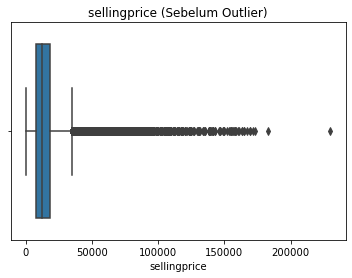

In [ ]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Sebelum Outlier)');

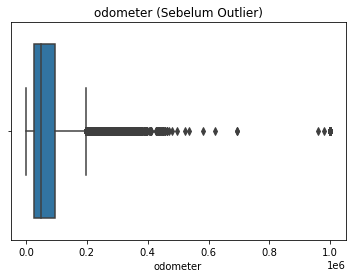

In [ ]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Sebelum Outlier)');

In [ ]:
# Fungsi IQR Untuk Handling Outlier
filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris sebelum filter outlier: {len(df)}')

print(f'Jumlah baris setelah filter outlier: {len(df)}')

Jumlah baris sebelum filter outlier: 506995
Jumlah baris setelah filter outlier: 506995


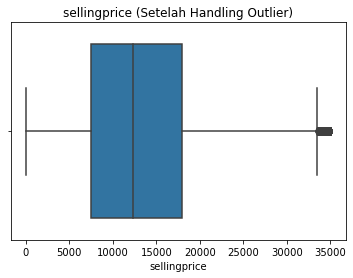

In [ ]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Setelah Handling Outlier)');

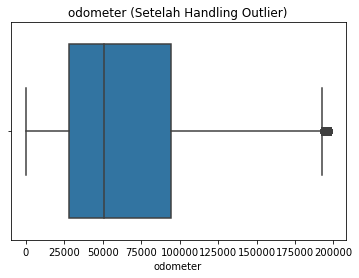

In [ ]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Setelah Handling Outlier)');

### Cara 2 : Menggunakan Z-Score

In [ ]:
import scipy.stats as stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 506995


In [ ]:
# Fungsi Looping 
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['sellingprice', 'odometer']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_1_zscore = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_1_zscore)}')

Jumlah baris sebelum memfilter outlier: 506995
Jumlah baris setelah memfilter outlier: 506995


In [ ]:
df.duplicated().sum()

3

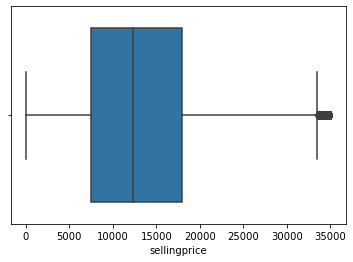

In [ ]:
sns.boxplot(x=df_1_zscore['sellingprice']);

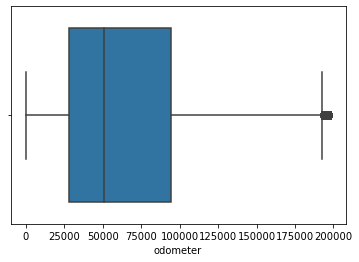

In [ ]:
sns.boxplot(x=df_1_zscore['odometer']);

## Part 2.5 - Feature Engineering

### Feature Selection

Feature yang dibuang : mmr, vin, interior, seller, saledate dan state

Feature yang digunakan : year, make, model, trim, body, transmission, condition, odometer, color dan sellingprice (sebagai target)

### Feature Extraction

#### Mapping top_10_make

In [ ]:
#Mengkerucutkan top 10 make
def top_10_make(x):
  if x['make'] == 'ford':
    top_10_make = 'ford'
  elif x['make'] == 'chevrolet':
    top_10_make = 'chevrolet'
  elif x['make'] == 'nissan':
    top_10_make = 'nissan'
  elif x['make'] == 'toyota':
    top_10_make = 'toyota'
  elif x['make'] == 'dodge':
    top_10_make = 'dodge'
  elif x['make'] == 'honda':
    top_10_make = 'honda'
  elif x['make'] == 'hyundai':
    top_10_make = 'hyundai'
  elif x['make'] == 'bmw':
    top_10_make = 'bmw'
  elif x['make'] == 'kia':
    top_10_make = 'kia'
  else:
    top_10_make = 'others'
  return top_10_make

df['top_10_make'] = df.apply(lambda x: top_10_make(x), axis=1)

#### Mapping top_10_body 

In [ ]:
df['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'g37 convertible', 'club cab', 'xtracab',
       'q60 convertible', 'cts wagon', 'cts-v coupe', 'g37 coupe',
       'mega cab', 'cab plus 4', 'q60 coupe', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van', 'cab plus', 'ram van',
       'transit van', 'regular-cab'], dtype=object)

In [ ]:
len(df['body'].unique())

43

In [ ]:
df['body'] = df['body'].str.lower()
len(df['body'].unique())

43

In [ ]:
body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [ ]:
df['body'].value_counts().iloc[:10]


sedan          236174
suv            130887
cab             33592
van             30131
hatchback       25402
coupe           17855
wagon           15440
convertible      9435
others           8079
Name: body, dtype: int64

#### Mapping top_10_color

In [ ]:
def top_10_color(x):
  if x['color'] == 'black':
    top_10_color = 'black'
  elif x['color'] == 'white':
    top_10_color = 'white'
  elif x['color'] == 'gray':
    top_10_color = 'gray'
  elif x['color'] == 'silver':
    top_10_color = 'silver'
  elif x['color'] == 'blue':
    top_10_color = 'blue'
  elif x['color'] == 'red':
    top_10_color = 'red'
  elif x['color'] == 'gold':
    top_10_color = 'gold'
  elif x['color'] == 'green':
    top_10_color = 'green'
  elif x['color'] == 'burgundy':
    top_10_color = 'burgundy'
  else:
    top_10_color = 'others'
  return top_10_color

df['top_10_color'] = df.apply(lambda x: top_10_color(x), axis=1)

#### Mapping top_10_model

In [ ]:
#Mengkerucutkan top 10 model
def top_10_model(x):
  if x['model'] == 'altima':
    top_10_model = 'altima'
  elif x['model'] == 'f-150':
    top_10_model = 'f-150'
  elif x['model'] == 'fusion':
    top_10_model = 'fusion'
  elif x['model'] == 'camry':
    top_10_model = 'camry'
  elif x['model'] == 'escape':
    top_10_model = 'escape'
  elif x['model'] == 'focus':
    top_10_model = 'focus'
  elif x['model'] == 'accord':
    top_10_model = 'accord'
  elif x['model'] == '3 series':
    top_10_model = '3 series'
  elif x['model'] == 'grand caravan':
    top_10_model = 'grand caravan'
  else:
    top_10_model = 'others'
  return top_10_model
  
df['top_10_model'] = df.apply(lambda x: top_10_model(x), axis=1)

#### Mapping top_10_trim

In [ ]:
def top_10_trim(x):
  if x['trim'] == 'base':
    top_10_trim = 'base'
  elif x['trim'] == 'se':
    top_10_trim = 'se'
  elif x['trim'] == 'lx':
    top_10_trim = 'lx'
  elif x['trim'] == 'limited':
    top_10_trim = 'limited'
  elif x['trim'] == 'lt':
    top_10_trim = 'lt'
  elif x['trim'] == 'xlt':
    top_10_trim = 'xlt'
  elif x['trim'] == 'ls':
    top_10_trim = 'ls'
  elif x['trim'] == 'le':
    top_10_trim = 'le'
  elif x['trim'] == 'gls':
    top_10_trim = 'gls'
  else:
    top_10_trim = 'others'
  return top_10_trim

df['top_10_trim'] = df.apply(lambda x: top_10_trim(x), axis=1)

### Feature Transformation

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,506995.000000,506995.000000,506995.000000,506995.000000
mean,2010.299549,3.435051,63886.840286,13120.561282
std,3.693069,0.932122,45295.112324,7635.107447
min,1990.000000,1.000000,1.000000,1.000000
25%,2008.000000,2.700000,28326.000000,7500.000000
50%,2012.000000,3.600000,50483.000000,12300.000000
75%,2013.000000,4.200000,94103.000000,17900.000000
max,2015.000000,5.000000,197911.000000,35000.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisasi feature year dan odometer
df['year_norm'] = MinMaxScaler().fit_transform(df['year'].values.reshape(len(df), 1))
df['odometer_norm'] = MinMaxScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))

# standarisasi feature sellingprice dan condition
df['sellingprice_std'] = StandardScaler().fit_transform(df['sellingprice'].values.reshape(len(df), 1))
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,year,condition,odometer,sellingprice,year_norm,odometer_norm,sellingprice_std,condition_std
count,506995.000000,506995.000000,506995.000000,506995.000000,506995.000000,506995.000000,5.069950e+05,5.069950e+05
mean,2010.299549,3.435051,63886.840286,13120.561282,0.811982,0.322802,-5.157551e-16,3.691117e-16
std,3.693069,0.932122,45295.112324,7635.107447,0.147723,0.228867,1.000001e+00,1.000001e+00
min,1990.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.718322e+00,-2.612377e+00
25%,2008.000000,2.700000,28326.000000,7500.000000,0.720000,0.143121,-7.361477e-01,-7.885794e-01
50%,2012.000000,3.600000,50483.000000,12300.000000,0.880000,0.255076,-1.074722e-01,1.769605e-01
75%,2013.000000,4.200000,94103.000000,17900.000000,0.920000,0.475479,6.259825e-01,8.206537e-01
max,2015.000000,5.000000,197911.000000,35000.000000,1.000000,1.000000,2.865639e+00,1.678911e+00


### Feature Encoding

In [ ]:
cats_update = ['top_10_make','top_10_model', 'top_10_trim', 'body','top_10_color','transmission']
cats_update

['top_10_make',
 'top_10_model',
 'top_10_trim',
 'body',
 'top_10_color',
 'transmission']

In [ ]:
# ##jangan di running dulu sebelum fixed/ fitur extraction untuk fitur2 kategorikal
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for x in cats_update:
#     df[x] = le.fit_transform(df[x].astype(str))


#### Label Encoding for Transsmission

In [ ]:
mapping_transmission = {
    'manual' : 0,
    'automatic' : 1
}
df['transmission'] = df['transmission'].map(mapping_transmission)

#### Label Encoding for Top 10 Make

In [ ]:
df['top_10_make'].value_counts(ascending = False)

others       163392
ford          88314
chevrolet     55454
nissan        52380
toyota        37149
dodge         29412
honda         25059
hyundai       21260
kia           17745
bmw           16830
Name: top_10_make, dtype: int64

In [ ]:
label_make = {
    'kia': 0,
    'bmw': 1,
    'hyundai': 2,
    'honda': 3,
    'dodge': 4,
    'toyota': 5,
    'nissan': 6,
    'chevrolet': 7,
    'ford': 8,
    'others': 9
}
df['top_10_make'] = df['top_10_make'].map(label_make)

#### Label Encoding for Top 10 Model

In [ ]:
df['top_10_model'].value_counts(ascending = False)

others           404929
altima            18973
f-150             13094
fusion            12813
camry             11852
escape            11624
focus             10181
accord             8258
grand caravan      7725
3 series           7546
Name: top_10_model, dtype: int64

In [ ]:
label_model = {
    'grand caravan': 0,
    'accord': 1,
    'focus': 2,
    '3 series': 3,
    'camry': 4,
    'fusion': 5,
    'escape': 6,
    'f-150': 7,
    'altima': 8,
    'others': 9
}
df['top_10_model'] = df['top_10_model'].map(label_model)


#### Label Encoding for Top 10 Trim

In [ ]:
df['top_10_trim'].value_counts(ascending = False)

others     308517
base        50188
se          42570
lx          19885
limited     17273
lt          16009
xlt         15700
ls          12470
le          12306
gls         12077
Name: top_10_trim, dtype: int64

In [ ]:
label_trim = {
    'le': 0,
    'gls': 1,
    'ls': 2,
    'xlt': 3,
    'lt': 4,
    'limited': 5,
    'lx': 6,
    'se': 7,
    'base': 8,
    'others': 9
}
df['top_10_trim'] = df['top_10_trim'].map(label_trim)

#### Label Encoding for Top 10 Body

In [ ]:
df['body'].value_counts(ascending = False)

sedan          236174
suv            130887
cab             33592
van             30131
hatchback       25402
coupe           17855
wagon           15440
convertible      9435
others           8079
Name: body, dtype: int64

In [ ]:
label_body = {
    'others': 0,
    'convertible': 1,
    'wagon': 2,
    'coupe': 3,
    'hatchback': 4,
    'van': 5,
    'cab': 6,
    'suv': 7,
    'sedan': 8
}
df['top_10_body'] = df['body'].map(label_body)

#### Label Encoding for Top 10 Color

In [ ]:
df['top_10_color'].value_counts(ascending = False)

black       99873
white       96835
gray        76847
silver      76619
blue        46756
others      42430
red         40061
gold         9841
green        9566
burgundy     8167
Name: top_10_color, dtype: int64

In [ ]:
label_color = {
    'burgundy': 0,
    'green': 1,
    'gold': 2,
    'red': 3,
    'others': 4,
    'blue': 5,
    'silver': 6,
    'gray': 7,
    'white': 8,
    'black': 9
}
df['top_10_color']  = df['top_10_color'].map(label_color)

### Data Used

# Stage 3 : Data Modelling

## Part 3.1 - With Normalization/Standarization

In [ ]:
X = df[['year', 'condition_std', 'odometer_norm', 'transmission', 'top_10_make', 'top_10_body', 'top_10_color', 'top_10_model', 'top_10_trim']].copy()
y = df[['sellingprice']].copy()

#### Split Data Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # pembagian data test 25%, train 75%

In [ ]:
X_train.head()

,year,condition_std,odometer_norm,transmission,top_10_make,top_10_body,top_10_color,top_10_model,top_10_trim
534929,2013,1.035218,0.132666,1,9,8,8,9,9
400944,2001,-1.646837,0.340139,0,9,8,6,9,6
444370,2012,1.035218,0.155586,1,9,8,9,9,9
435819,2013,-0.895862,0.477651,1,8,7,6,9,8
307079,2012,0.713371,0.447840,1,8,8,5,5,7


In [ ]:
X_test.head()

,year,condition_std,odometer_norm,transmission,top_10_make,top_10_body,top_10_color,top_10_model,top_10_trim
329207,2004,-1.646837,0.622364,1,9,8,9,9,9
327208,2011,-0.252168,0.175514,1,3,7,7,9,7
457913,2013,1.357065,0.680415,1,8,7,4,6,7
168146,2011,1.035218,0.236789,1,8,6,8,7,9
500166,2003,-0.788579,0.197792,1,4,8,6,9,9


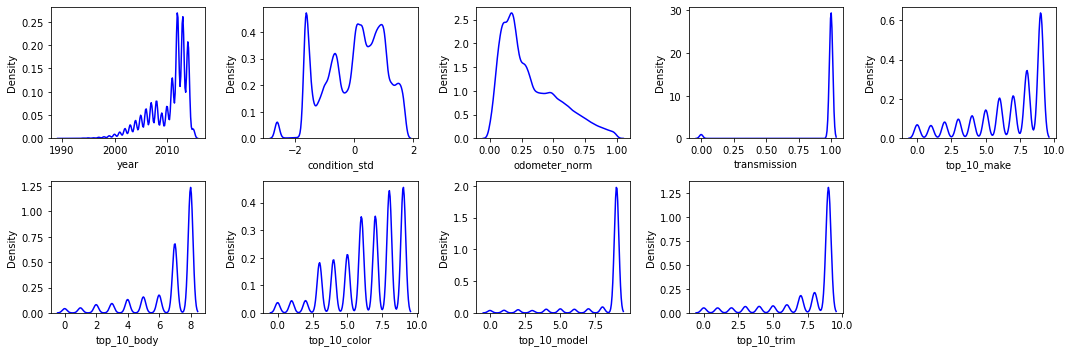

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(X_train.columns)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x = X_train[X_train.columns[i]], color = 'blue')
    plt.tight_layout()

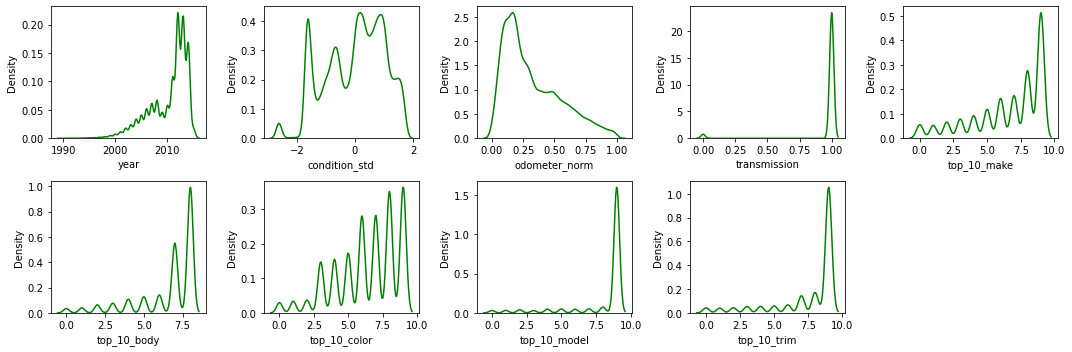

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(0, len(X_test.columns)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x = X_test[X_test.columns[i]], color = 'green')
    plt.tight_layout()

In [ ]:
# Membuat fungsi untuk memudahkan dalam mencoba berbagai algoritma

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

def test_metrics_evaluation(model, y_pred, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_test, y_pred, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
  print('R2: '+ str(r2_score(y_test, y_pred)))

def train_metrics_evaluation(model, y_pred_train, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_train, y_pred_train, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
  print('R2: '+ str(r2_score(y_train, y_pred_train)))

def show_feature_importance(model):
  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  ax = feature_importance.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()
  plt.xlabel('Score')
  plt.ylabel('Features')
  plt.title('Feature Importance Score')

def show_best_hyperparameter(model, hyperparameters):
  for key, value in hyperparameters.items():
    print('Best '+key+':', model.get_params()[key])

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

##evaluasi
eval_regression(regressor)

RMSE (test): 5173.590386204084
RMSE (train): 5145.803846095719
MAPE (test): 0.5315253276146871
MAPE (train): 0.6104557344237775
r2 (test): 0.5440595988119354
r2 (train): 0.5446997173716087


In [ ]:
def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

eval_regression(regressor)

RMSE (test): 5173.590386204084
RMSE (train): 5145.803846095719
MAPE (test): 0.5315253276146871
MAPE (train): 0.6104557344237775
r2 (test): 0.5440595988119354
r2 (train): 0.5446997173716087


In [ ]:
# Model Evaluation Regression (Apakah Model sudah Best Fit?)
print('Train Accuracy: ', regressor.score(X_train, y_train))
print('Test Accuracy: ', regressor.score(X_test, y_test))

Train Accuracy:  0.5446997173716087
Test Accuracy:  0.5440595988119354


### Regularization: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
eval_regression(ridge)

RMSE (test): 5173.590731545904
RMSE (train): 5145.803849600184
MAPE (test): 0.5315232672949556
MAPE (train): 0.6104506000814571
r2 (test): 0.544059537943068
r2 (train): 0.5446997167514591


#### Hyperparameter Tuning - Ridge

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01, 0.1, 1]
solver = ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
fit_intercept = [True, False]
hyperparameters = dict(alpha=alpha, solver=solver, fit_intercept=fit_intercept)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs.fit(X_train, y_train)
eval_regression(rs)

y_pred = rs.predict(X_test)
y_pred_train = rs.predict(X_train)

RMSE (test): 5173.586247363611
RMSE (train): 5145.815533179741
MAPE (test): 0.5316724428820805
MAPE (train): 0.6106325025220629
r2 (test): 0.5440603283106743
r2 (train): 0.5446976492248778


In [ ]:
# Model Evaluation Ridge (Apakah Model sudah Best Fit?)
print('Train score: ' + str(rs.score(X_train, y_train)))
print('Test score: ' + str(rs.score(X_test, y_test)))

Train score: 0.5446976492248778
Test score: 0.5440603283106743


### Regularization - Lasso

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
eval_regression(ridge)

RMSE (test): 5173.590731545904
RMSE (train): 5145.803849600184
MAPE (test): 0.5315232672949556
MAPE (train): 0.6104506000814571
r2 (test): 0.544059537943068
r2 (train): 0.5446997167514591


#### Hyperparameter Tuning - Lasso

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda
selection = ['cyclic', 'random']
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
clf.fit(X_train, y_train)
eval_regression(clf)

y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

RMSE (test): 5173.591053508588
RMSE (train): 5145.80384974794
MAPE (test): 0.5315225685913461
MAPE (train): 0.6104502340100307
r2 (test): 0.5440594811949305
r2 (train): 0.5446997167253123


In [ ]:
# Model Evaluation Lasso (Apakah Model sudah Best Fit?)
print('Train score: ' + str(clf.score(X_train, y_train)))
print('Test score: ' + str(clf.score(X_test, y_test)))

Train score: 0.5446997167253123
Test score: 0.5440594811949305


### Regularization - Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
eval_regression(elasticnet_model)

RMSE (test): 5400.332826120948
RMSE (train): 5365.029952498273
MAPE (test): 0.5889485867239881
MAPE (train): 0.6498362175333261
r2 (test): 0.5032189189438778
r2 (train): 0.5050791304298694


#### Hyperparameter Tuning - Elastic Net

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
enm = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')
enm.fit(X_train, y_train)
eval_regression(clf)

RMSE (test): 5173.591053508588
RMSE (train): 5145.80384974794
MAPE (test): 0.5315225685913461
MAPE (train): 0.6104502340100307
r2 (test): 0.5440594811949305
r2 (train): 0.5446997167253123


In [ ]:
# Model Evaluation Elastic Net (Apakah Model sudah Best Fit?)
print('Train score: ' + str(enm.score(X_train, y_train)))
print('Test score: ' + str(enm.score(X_test, y_test)))

Train score: 0.5446997173716086
Test score: 0.5440595988119352


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
eval_regression(dt)

RMSE (test): 4564.26506597858
RMSE (train): 45.87680976806181
MAPE (test): 0.32406294182393486
MAPE (train): 0.00034887099080451264
r2 (test): 0.6451329218004209
r2 (train): 0.9999638108914602


In [ ]:
# Model Evaluation Decision Tree (Apakah Model sudah Best Fit?)
print('Train Accuracy: ', dt.score(X_train, y_train))
print('Test Accuracy: ', dt.score(X_test, y_test))

Train Accuracy:  0.9999638108914602
Test Accuracy:  0.6451329218004209


##### Hyperparameter Tuning - Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] # Number of features to consider at every split
criterion = ['friedman_mse']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeRegressor(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, n_iter=15, cv=5, random_state=42, scoring='r2')
dt_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = dt_tuned.predict(X_test)
test_metrics_evaluation(dt_tuned, y_pred, X_train, y_train, X_test, y_test)

RMSE: 3468.29898726294
MAE: 2322.9822577429486
R2: 0.7950928780640859


In [ ]:
# Model Evaluation Decision Tree (Apakah Model sudah Best Fit?)
print('Train score: ' + str(dt_tuned.score(X_train, y_train)))
print('Test score:' + str(dt_tuned.score(X_test, y_test)))

Train score: 0.8346527476230776
Test score:0.7950928780640859


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
eval_regression(rf)

RMSE (test): 3399.5115866305055
RMSE (train): 1274.7675974441108
MAPE (test): 0.26036286343772475
MAPE (train): 0.11408222092451407
r2 (test): 0.803140196774834
r2 (train): 0.9720582567844908


In [ ]:
# Model Evaluation Random Forest (Apakah Model sudah Best Fit?)
print('Train Accuracy: ', rf.score(X_train, y_train))
print('Test Accuracy: ', rf.score(X_test, y_test))

Train Accuracy:  0.9720582567844908
Test Accuracy:  0.803140196774834


##### Hyperparameter Tuning - Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [15]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Init
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, n_iter=15, scoring='r2')
rf_tuned.fit(X_train, y_train)
# Predict & Evaluation
pred = rf_tuned.predict(X_test)
test_metrics_evaluation(rf_tuned, pred, X_train, y_train, X_test, y_test)

RMSE: 3340.938083068495
MAE: 2250.298573142945
R2: 0.8098655340251864


In [ ]:
# Model Evaluation Random Forest (Apakah Model sudah Best Fit?)
print('Train score: ' + str(rf_tuned.score(X_train, y_train)))
print('Test score:' + str(rf_tuned.score(X_test, y_test)))

Train score: 0.8719374011909071
Test score:0.8098655340251864


### XGBOOST

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBRegressor(random_state=42)
xg.fit(X_train, y_train)
eval_regression(xg)

RMSE (test): 3333.818288054545
RMSE (train): 3276.0594468620634
MAPE (test): 0.26116210329220724
MAPE (train): 0.31065997534551026
r2 (test): 0.8106750527593676
r2 (train): 0.8154580892335093


In [ ]:
# Model Evaluation XGBoost(Apakah Model sudah Best Fit?)
print("Train Accuracy : ",xg.score(X_train,y_train))
print("Test Accuracy : ",xg.score(X_test,y_test))

Train Accuracy :  0.8154580892335093
Test Accuracy :  0.8106750527593676


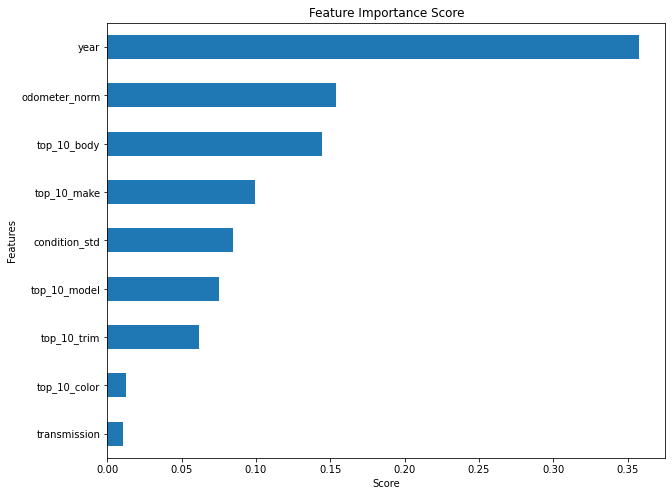

In [ ]:
show_feature_importance(xg)

#### Hyperparameter Tuning - XGBOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBRegressor
xg = XGBRegressor(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='r2')
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_regression(xg_tuned)

RMSE (test): 3446.7252797082206
RMSE (train): 2908.9293824482857
MAPE (test): 0.2856184800571927
MAPE (train): 0.27713657288397864
r2 (test): 0.7976340993885572
r2 (train): 0.8545017324504407


In [ ]:
# Model Evaluation XGBoost (Apakah Model sudah Best Fit?)
print("Train Accuracy : ",xg_tuned.score(X_train,y_train))
print("Test Accuracy : ",xg_tuned.score(X_test,y_test))

Train Accuracy :  0.8545017324504407
Test Accuracy :  0.7976340993885572


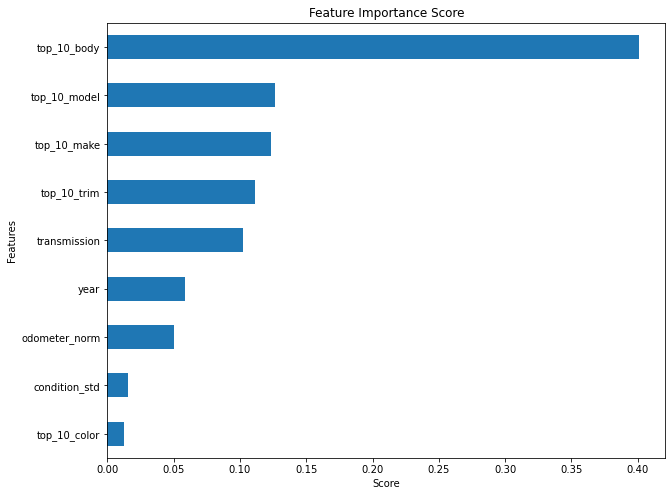

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

### LightGBM

In [ ]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
eval_regression(lgbm)

RMSE (test): 3398.7826295272152
RMSE (train): 3375.3370225586514
MAPE (test): 0.2732379954249057
MAPE (train): 0.3265884427435109
r2 (test): 0.8032246129991389
r2 (train): 0.804103917351347


In [ ]:
# Model Evaluation LightGBM (Apakah Model sudah Best Fit?)
print('Train Accuracy: ', lgbm.score(X_train, y_train))
print('Test Accuracy: ', lgbm.score(X_test, y_test))

Train Accuracy:  0.804103917351347
Test Accuracy:  0.8032246129991389


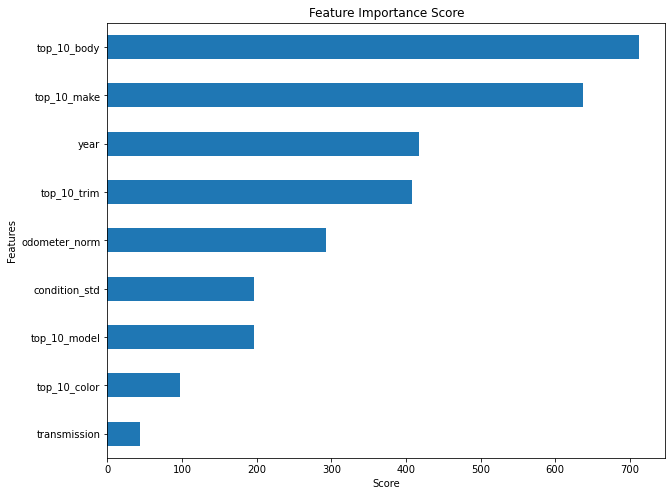

In [ ]:
show_feature_importance(lgbm)

#### Hyperparameter Tuning - LightGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
learning_rate = [0.9]
min_data_in_leaf = [10]
min_sum_hessian_in_leaf = [100]

hyperparameters = dict(learning_rate=learning_rate,
                       min_data_in_leaf=min_data_in_leaf,
                       min_sum_hessian_in_leaf=min_sum_hessian_in_leaf
                      )

# Inisialisasi Model
lgbm = LGBMRegressor(random_state=42)
lgbm_tuned = RandomizedSearchCV(lgbm, hyperparameters, n_iter=15, cv=5, random_state=42, scoring='r2')
lgbm_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = lgbm_tuned.predict(X_test)
test_metrics_evaluation(lgbm_tuned, y_pred, X_train, y_train, X_test, y_test)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be igno

In [ ]:
# Model Evaluation LightGBM (Apakah Model sudah Best Fit?)
print('Train score: ' + str(lgbm_tuned.score(X_train, y_train)))
print('Test score:' + str(lgbm_tuned.score(X_test, y_test)))

Train score: 0.8209197949734403
Test score:0.8133293503945805


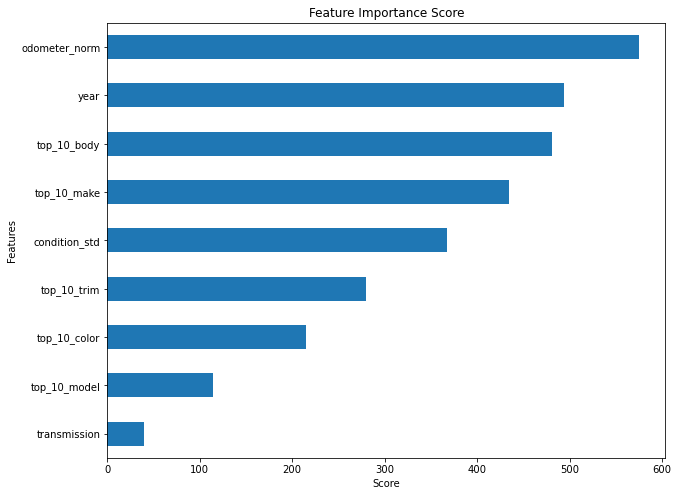

In [ ]:
show_feature_importance(lgbm_tuned.best_estimator_)

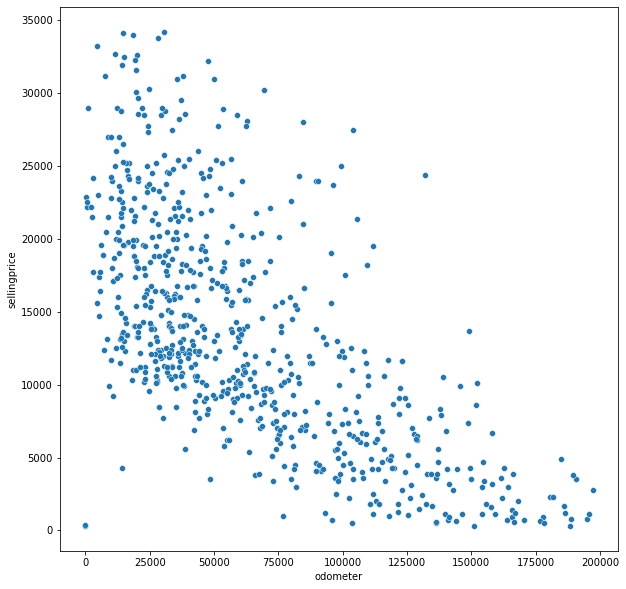

In [ ]:
# odometer
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'odometer', y= 'sellingprice', data=df.sample(700));

Semakin tinggi odometer maka semakin rendah harga mobil yang dijual.

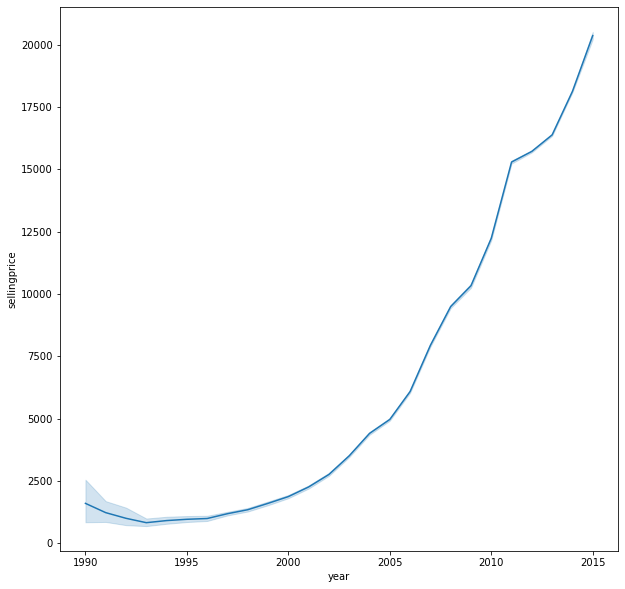

In [ ]:
# year
plt.figure(figsize=(10,10))
sns.lineplot(x='year', y='sellingprice', data=df);

The End